Job Recomendation Using Knowledge Graph

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset= pd.read_csv("Resume_Dataset/survey_results_public.csv")
dataset

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11956\877606632.py:1: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset= pd.read_csv("Resume_Dataset/survey_results_public.csv")


Respondent Hobby OpenSource             Country         Student  \
0               1   Yes         No               Kenya              No   
1               3   Yes        Yes      United Kingdom              No   
2               4   Yes        Yes       United States              No   
3               5    No         No       United States              No   
4               7   Yes         No        South Africa  Yes, part-time   
...           ...   ...        ...                 ...             ...   
98850      101513   Yes        Yes       United States             NaN   
98851      101531    No        Yes               Spain  Yes, full-time   
98852      101541   Yes        Yes               India  Yes, full-time   
98853      101544   Yes         No  Russian Federation              No   
98854      101548   Yes        Yes            Cambodia             NaN   

                                              Employment  \
0                                     Employed part-time   
1                                     Employed full-time   
2                                     Employed full-time   
3                                     Employed full-time   
4                                     Employed full-time   
...                                                  ...   
98850                                                NaN   
98851                 Not employed, but looking for work   
98852                                 Employed full-time   
98853  Independent contractor, freelancer, or self-em...   
98854                                                NaN   

                                         FormalEducation  \
0               Bachelor’s degree (BA, BS, B.Eng., etc.)   
1               Bachelor’s degree (BA, BS, B.Eng., etc.)   
2                                       Associate degree   
3               Bachelor’s degree (BA, BS, B.Eng., etc.)   
4      Some college/university study without earning ...   
...                                                  ...   
98850                                                NaN   
98851                                                NaN   
98852           Bachelor’s degree (BA, BS, B.Eng., etc.)   
98853  Some college/university study without earning ...   
98854                                                NaN   

                                          UndergradMajor  \
0                              Mathematics or statistics   
1      A natural science (ex. biology, chemistry, phy...   
2      Computer science, computer engineering, or sof...   
3      Computer science, computer engineering, or sof...   
4      Computer science, computer engineering, or sof...   
...                                                  ...   
98850                                                NaN   
98851                                                NaN   
98852                                                NaN   
98853                                                NaN   
98854                                                NaN   

                    CompanySize  \
0            20 to 99 employees   
1      10,000 or more employees   
2            20 to 99 employees   
3          100 to 499 employees   
4      10,000 or more employees   
...                         ...   
98850                       NaN   
98851                       NaN   
98852                       NaN   
98853                       NaN   
98854                       NaN   

                                                 DevType  ...  \
0                                   Full-stack developer  ...   
1      Database administrator;DevOps specialist;Full-...  ...   
2               Engineering manager;Full-stack developer  ...   
3                                   Full-stack developer  ...   
4      Data or business analyst;Desktop or enterprise...  ...   
...                                                  ...  ...   
98850                                                NaN  ...   
98851         

In [4]:
dataset.columns

Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       ...
       'Exercise', 'Gender', 'SexualOrientation', 'EducationParents',
       'RaceEthnicity', 'Age', 'Dependents', 'MilitaryUS', 'SurveyTooLong',
       'SurveyEasy'],
      dtype='object', length=129)

In [7]:
resume_subset= dataset[['Respondent','Country','Student','CompanySize','Dependents','DevType','Gender','JobSatisfaction','LastNewJob','Salary','LanguageWorkedWith','LanguageDesireNextYear','DatabaseWorkedWith','DatabaseDesireNextYear','PlatformWorkedWith','PlatformDesireNextYear','FrameworkWorkedWith','FrameworkDesireNextYear','OperatingSystem','HypotheticalTools1','Age']]
resume_subset

Respondent             Country         Student  \
0               1               Kenya              No   
1               3      United Kingdom              No   
2               4       United States              No   
3               5       United States              No   
4               7        South Africa  Yes, part-time   
...           ...                 ...             ...   
98850      101513       United States             NaN   
98851      101531               Spain  Yes, full-time   
98852      101541               India  Yes, full-time   
98853      101544  Russian Federation              No   
98854      101548            Cambodia             NaN   

                    CompanySize Dependents  \
0            20 to 99 employees        Yes   
1      10,000 or more employees        Yes   
2            20 to 99 employees        NaN   
3          100 to 499 employees         No   
4      10,000 or more employees        Yes   
...                         ...        ...   
98850                       NaN        NaN   
98851                       NaN        NaN   
98852                       NaN        NaN   
98853                       NaN        NaN   
98854                       NaN        NaN   

                                                 DevType Gender  \
0                                   Full-stack developer   Male   
1      Database administrator;DevOps specialist;Full-...   Male   
2               Engineering manager;Full-stack developer    NaN   
3                                   Full-stack developer   Male   
4      Data or business analyst;Desktop or enterprise...   Male   
...                                                  ...    ...   
98850                                                NaN    NaN   
98851             Back-end developer;Front-end developer    NaN   
98852                                                NaN    NaN   
98853                                                NaN    NaN   
98854                                                NaN    NaN   

                          JobSatisfaction                 LastNewJob  Salary  \
0                     Extremely satisfied       Less than a year ago     NaN   
1                 Moderately dissatisfied      More than 4 years ago   51000   
2                    Moderately satisfied       Less than a year ago     NaN   
3      Neither satisfied nor dissatisfied       Less than a year ago     NaN   
4                      Slightly satisfied  Between 1 and 2 years ago  260000   
...                                   ...                        ...     ...   
98850                                 NaN                        NaN     NaN   
98851                                 NaN                        NaN     NaN   
98852                                 NaN                        NaN     NaN   
98853                                 NaN                        NaN     NaN   
98854                                 NaN                        NaN     NaN   

       ...                            LanguageDesireNextYear  \
0      ...                        JavaScript;Python;HTML;CSS   
1      ...                                         Go;Python   
2      ...                                               NaN   
3      ...  C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell   
4      ...              Assembly;C;C++;Matlab;SQL;Bash/Shell   
...    ...                                               ...   
98850  ...                                               NaN   
98851  ...                                               NaN   
98852  ...                                               NaN   
98853  ...                                               NaN   
98854  ...                                               NaN   

                                      DatabaseWorkedWith  \
0      Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...   
1                             Redis;PostgreSQL;Memcached   
2                                                    N

In [8]:
resume_subset.isna().sum()

Respondent                     0
Country                      412
Student                     3954
CompanySize                27324
Dependents                 36259
DevType                     6757
Gender                     34386
JobSatisfaction            29579
LastNewJob                 19966
Salary                     48277
LanguageWorkedWith         20521
LanguageDesireNextYear     25611
DatabaseWorkedWith         32585
DatabaseDesireNextYear     41357
PlatformWorkedWith         32856
PlatformDesireNextYear     37502
FrameworkWorkedWith        47235
FrameworkDesireNextYear    43637
OperatingSystem            22676
HypotheticalTools1         28787
Age                        34281
dtype: int64

In [9]:
resume_subset.describe()

Respondent
count   98855.000000
mean    50822.971635
std     29321.650410
min         1.000000
25%     25443.500000
50%     50823.000000
75%     76219.500000
max    101592.000000

In [14]:
resume_subset.dtypes

Respondent                  int64
Country                    object
Student                    object
CompanySize                object
Dependents                 object
DevType                    object
Gender                     object
JobSatisfaction            object
LastNewJob                 object
Salary                     object
LanguageWorkedWith         object
LanguageDesireNextYear     object
DatabaseWorkedWith         object
DatabaseDesireNextYear     object
PlatformWorkedWith         object
PlatformDesireNextYear     object
FrameworkWorkedWith        object
FrameworkDesireNextYear    object
OperatingSystem            object
HypotheticalTools1         object
Age                        object
dtype: object

In [16]:
Resume= resume_subset.dropna()
Resume

Respondent         Country         Student               CompanySize  \
1               3  United Kingdom              No  10,000 or more employees   
5               8  United Kingdom              No        10 to 19 employees   
17             27          Sweden              No        10 to 19 employees   
20             33       Australia              No  1,000 to 4,999 employees   
22             37  United Kingdom              No        20 to 99 employees   
...           ...             ...             ...                       ...   
71505      101560   United States              No  1,000 to 4,999 employees   
71510      101567       Australia  Yes, full-time  10,000 or more employees   
71517      101576   United States              No  10,000 or more employees   
71524      101584   United States  Yes, full-time        20 to 99 employees   
71526      101587          Canada              No   Fewer than 10 employees   

      Dependents                                            DevType Gender  \
1            Yes  Database administrator;DevOps specialist;Full-...   Male   
5             No  Back-end developer;Database administrator;Fron...   Male   
17           Yes                                 Back-end developer   Male   
20           Yes  Database administrator;Full-stack developer;Mo...   Male   
22            No  Back-end developer;Database administrator;Desi...   Male   
...          ...                                                ...    ...   
71505        Yes                                Front-end developer   Male   
71510         No                                 Back-end developer   Male   
71517         No  Back-end developer;Desktop or enterprise appli...   Male   
71524         No  Back-end developer;C-suite executive (CEO, CTO...   Male   
71526         No  Back-end developer;Full-stack developer;Produc...   Male   

               JobSatisfaction                 LastNewJob     Salary  ...  \
1      Moderately dissatisfied      More than 4 years ago      51000  ...   
5         Moderately satisfied  Between 2 and 4 years ago      30000  ...   
17        Moderately satisfied  Between 1 and 2 years ago      32000  ...   
20          Slightly satisfied  Between 2 and 4 years ago     120000  ...   
22          Slightly satisfied      More than 4 years ago         25  ...   
...                        ...                        ...        ...  ...   
71505      Extremely satisfied       Less than a year ago      85000  ...   
71510     Moderately satisfied  Between 1 and 2 years ago     140000  ...   
71517       Slightly satisfied       Less than a year ago      80000  ...   
71524      Extremely satisfied      More than 4 years ago     165000  ...   
71526      Extremely satisfied  Between 1 and 2 years ago  80,000.00  ...   

                                  LanguageDesireNextYear  \
1                                              Go;Python   
5      C#;Go;Java;JavaScript;Python;SQL;TypeScript;HT...   
17                               C#;F#;Haskell;SQL;Ocaml   
20                      C;C++;Go;Python;SQL;Swift;Kotlin   
22                        C#;JavaScript;PHP;SQL;HTML;CSS   
...                                                  ...   
71505     C++;C#;Java;JavaScript;SQL;HTML;CSS;Bash/Shell   
71510      Java;JavaScript;Python;Ruby;TypeScript;Kotlin   
71517                    C#;F#;JavaScript;SQL;TypeScript   
71524                                          Clojure;R   
71526                                      Python;Kotlin   

                                      DatabaseWorkedWith  \
1                             Redis;PostgreSQL;Memcached   
5                                                MongoDB   
17                                            SQL Server   
20                               Redis;PostgreSQL;SQLite   
22                                                 MySQL   
...                                                  ...   
71505                           MongoDB;MySQL;PostgreSQ

array([[<AxesSubplot:title={'center':'Respondent'}>]], dtype=object)

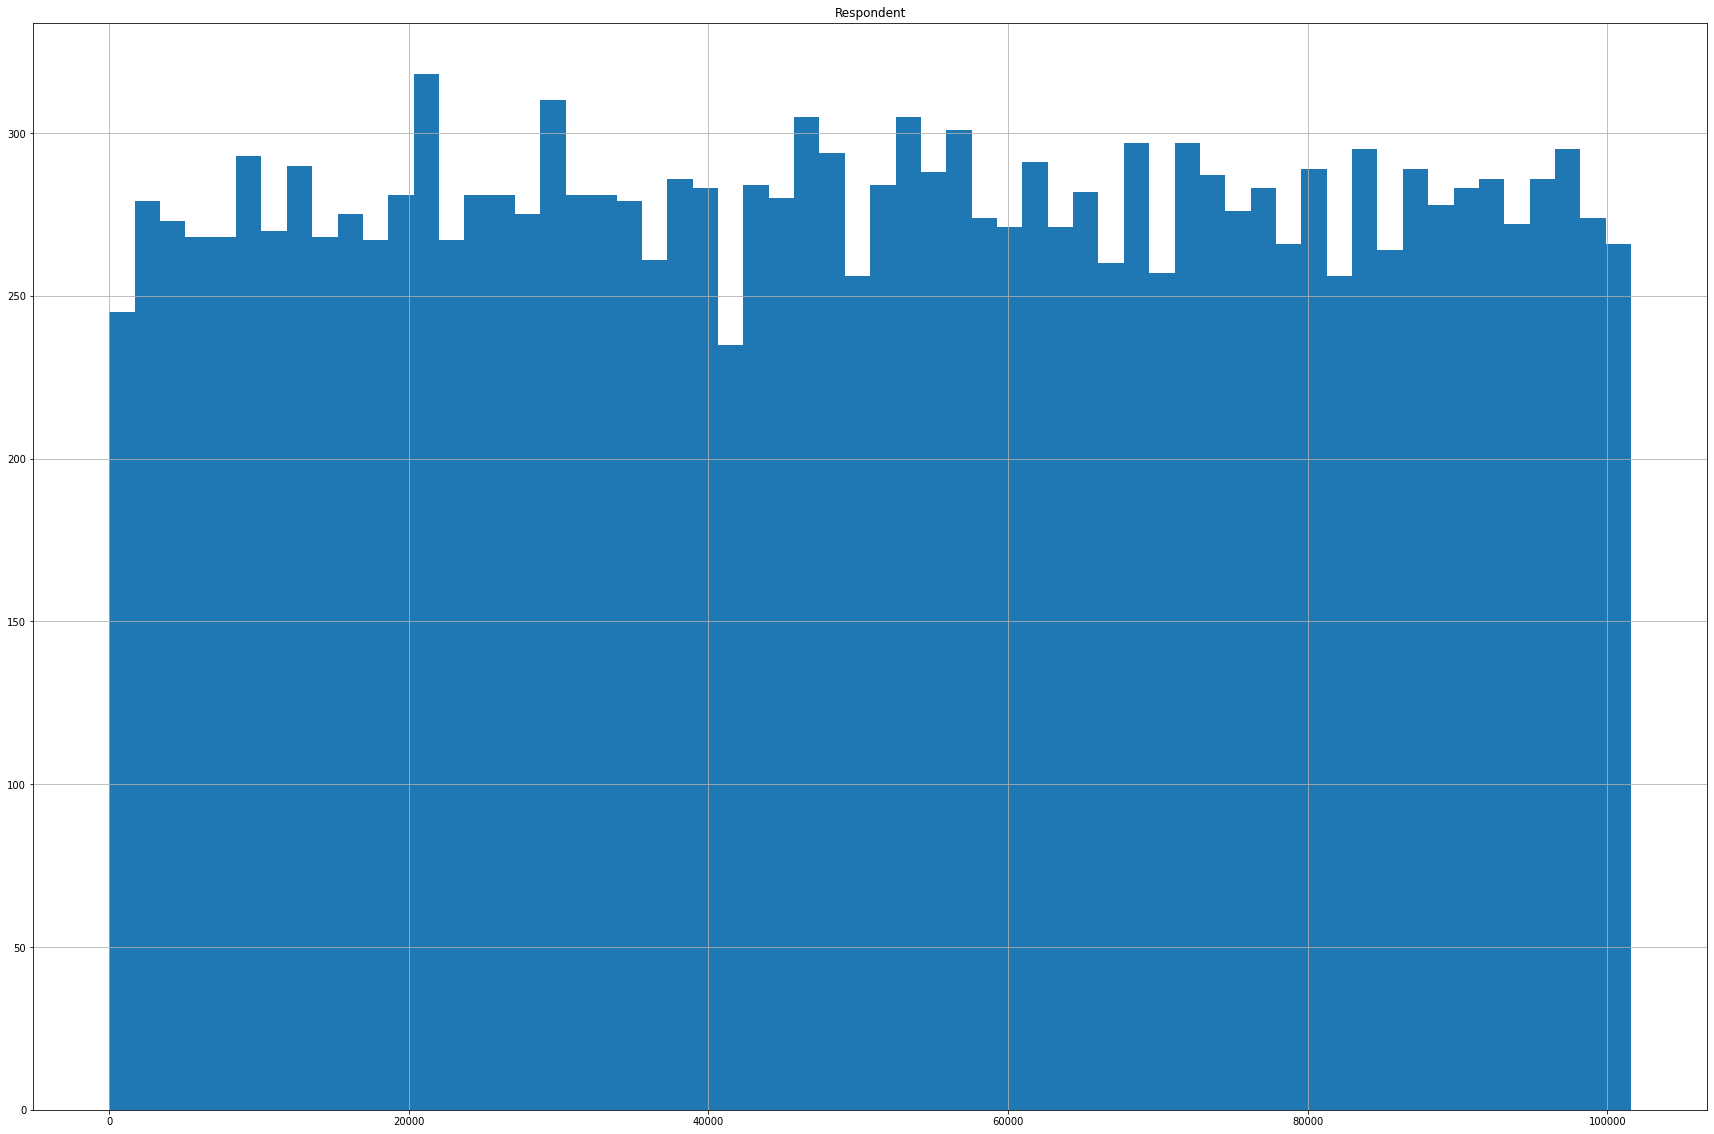

In [20]:
Resume.hist(bins=60, figsize=(30,20))

In [55]:
Resume['DevType'].value_counts()

Full-stack developer                                                                                                                                                                1340
Back-end developer;Front-end developer;Full-stack developer                                                                                                                         1175
Back-end developer                                                                                                                                                                  1085
Back-end developer;Full-stack developer                                                                                                                                              801
Back-end developer;Front-end developer;Full-stack developer;Mobile developer                                                                                                         377
                                                                           

In [81]:
Devtype_value= Resume['DevType'].value_counts()
Resume2= Resume[~Resume['DevType'].isin(Devtype_value[Devtype_value>100].index)]
Resume2

Respondent         Country         Student               CompanySize  \
1               3  United Kingdom              No  10,000 or more employees   
20             33       Australia              No  1,000 to 4,999 employees   
22             37  United Kingdom              No        20 to 99 employees   
30             47          Poland              No        20 to 99 employees   
37             56         Belgium  Yes, part-time        20 to 99 employees   
...           ...             ...             ...                       ...   
71497      101551           India              No   Fewer than 10 employees   
71502      101557   United States  Yes, full-time  5,000 to 9,999 employees   
71504      101559           Italy              No      100 to 499 employees   
71524      101584   United States  Yes, full-time        20 to 99 employees   
71526      101587          Canada              No   Fewer than 10 employees   

      Dependents                                            DevType Gender  \
1            Yes  Database administrator;DevOps specialist;Full-...   Male   
20           Yes  Database administrator;Full-stack developer;Mo...   Male   
22            No  Back-end developer;Database administrator;Desi...   Male   
30            No             Back-end developer;Engineering manager   Male   
37           Yes  Back-end developer;Database administrator;Fron...   Male   
...          ...                                                ...    ...   
71497         No  Back-end developer;Front-end developer;Mobile ...   Male   
71502         No                               QA or test developer   Male   
71504         No  Front-end developer;Game or graphics developer...   Male   
71524         No  Back-end developer;C-suite executive (CEO, CTO...   Male   
71526         No  Back-end developer;Full-stack developer;Produc...   Male   

               JobSatisfaction                 LastNewJob     Salary  ...  \
1      Moderately dissatisfied      More than 4 years ago      51000  ...   
20          Slightly satisfied  Between 2 and 4 years ago     120000  ...   
22          Slightly satisfied      More than 4 years ago         25  ...   
30          Slightly satisfied       Less than a year ago       8500  ...   
37       Slightly dissatisfied  Between 2 and 4 years ago       2600  ...   
...                        ...                        ...        ...  ...   
71497    Slightly dissatisfied       Less than a year ago       1500  ...   
71502       Slightly satisfied       Less than a year ago        500  ...   
71504     Moderately satisfied       Less than a year ago      25000  ...   
71524      Extremely satisfied      More than 4 years ago     165000  ...   
71526      Extremely satisfied  Between 1 and 2 years ago  80,000.00  ...   

                                  LanguageDesireNextYear  \
1                                              Go;Python   
20                      C;C++;Go;Python;SQL;Swift;Kotlin   
22                        C#;JavaScript;PHP;SQL;HTML;CSS   
30                             Erlang;Go;JavaScript;Rust   
37                 C#;JavaScript;SQL;TypeScript;HTML;CSS   
...                                                  ...   
71497                                        Objective-C   
71502  Groovy;Haskell;Java;JavaScript;Python;HTML;CSS...   
71504   C;C++;Java;JavaScript;TypeScript;VB.NET;HTML;CSS   
71524                                          Clojure;R   
71526                                      Python;Kotlin   

                                      DatabaseWorkedWith  \
1                             Redis;PostgreSQL;Memcached   
20                               Redis;PostgreSQL;SQLite   
22                                                 MySQL   
30                        MongoDB;Redis;MySQL;PostgreSQL   
37                                 SQL Server;PostgreSQL   
...                                                  ...   
71497                        SQL Server;MySQL;PostgreSQ

In [82]:
Resume2['Age'].value_counts()

25 - 34 years old     4932
18 - 24 years old     2011
35 - 44 years old     1821
45 - 54 years old      401
55 - 64 years old       87
Under 18 years old      19
65 years or older        2
Name: Age, dtype: int64

In [83]:
Resume2['OperatingSystem'].value_counts()

Windows        4650
MacOS          2662
Linux-based    1952
BSD/Unix          9
Name: OperatingSystem, dtype: int64

In [99]:
location= Resume2['Country'].value_counts()
location[location>50].sum()

8138

In [113]:
Resume3= Resume2[Resume2['Country'].isin(location[location>50].index)]
Resume3

Respondent         Country         Student               CompanySize  \
1               3  United Kingdom              No  10,000 or more employees   
20             33       Australia              No  1,000 to 4,999 employees   
22             37  United Kingdom              No        20 to 99 employees   
30             47          Poland              No        20 to 99 employees   
37             56         Belgium  Yes, part-time        20 to 99 employees   
...           ...             ...             ...                       ...   
71497      101551           India              No   Fewer than 10 employees   
71502      101557   United States  Yes, full-time  5,000 to 9,999 employees   
71504      101559           Italy              No      100 to 499 employees   
71524      101584   United States  Yes, full-time        20 to 99 employees   
71526      101587          Canada              No   Fewer than 10 employees   

      Dependents                                            DevType Gender  \
1            Yes  Database administrator;DevOps specialist;Full-...   Male   
20           Yes  Database administrator;Full-stack developer;Mo...   Male   
22            No  Back-end developer;Database administrator;Desi...   Male   
30            No             Back-end developer;Engineering manager   Male   
37           Yes  Back-end developer;Database administrator;Fron...   Male   
...          ...                                                ...    ...   
71497         No  Back-end developer;Front-end developer;Mobile ...   Male   
71502         No                               QA or test developer   Male   
71504         No  Front-end developer;Game or graphics developer...   Male   
71524         No  Back-end developer;C-suite executive (CEO, CTO...   Male   
71526         No  Back-end developer;Full-stack developer;Produc...   Male   

               JobSatisfaction                 LastNewJob     Salary  ...  \
1      Moderately dissatisfied      More than 4 years ago      51000  ...   
20          Slightly satisfied  Between 2 and 4 years ago     120000  ...   
22          Slightly satisfied      More than 4 years ago         25  ...   
30          Slightly satisfied       Less than a year ago       8500  ...   
37       Slightly dissatisfied  Between 2 and 4 years ago       2600  ...   
...                        ...                        ...        ...  ...   
71497    Slightly dissatisfied       Less than a year ago       1500  ...   
71502       Slightly satisfied       Less than a year ago        500  ...   
71504     Moderately satisfied       Less than a year ago      25000  ...   
71524      Extremely satisfied      More than 4 years ago     165000  ...   
71526      Extremely satisfied  Between 1 and 2 years ago  80,000.00  ...   

                                  LanguageDesireNextYear  \
1                                              Go;Python   
20                      C;C++;Go;Python;SQL;Swift;Kotlin   
22                        C#;JavaScript;PHP;SQL;HTML;CSS   
30                             Erlang;Go;JavaScript;Rust   
37                 C#;JavaScript;SQL;TypeScript;HTML;CSS   
...                                                  ...   
71497                                        Objective-C   
71502  Groovy;Haskell;Java;JavaScript;Python;HTML;CSS...   
71504   C;C++;Java;JavaScript;TypeScript;VB.NET;HTML;CSS   
71524                                          Clojure;R   
71526                                      Python;Kotlin   

                                      DatabaseWorkedWith  \
1                             Redis;PostgreSQL;Memcached   
20                               Redis;PostgreSQL;SQLite   
22                                                 MySQL   
30                        MongoDB;Redis;MySQL;PostgreSQL   
37                                 SQL Server;PostgreSQL   
...                                                  ...   
71497                        SQL Server;MySQL;PostgreSQ

In [135]:
gender_value=Resume3.groupby('Gender')['Gender'].agg('count').sort_values(ascending=False)
print(gender_value)

Series([], Name: Gender, dtype: int64)


In [133]:
gender_less_than_40= gender_value[gender_value<40]
gender_less_than_40

Series([], Name: Gender, dtype: int64)

In [136]:
Resume3.Gender= Resume3.Gender.apply(lambda x: 'other' if x in gender_less_than_40 else x)
len(Resume3.Gender.unique())

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11956\1090447623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Resume3.Gender= Resume3.Gender.apply(lambda x: 'other' if x in gender_less_than_40 else x)


1